In [4]:
import pandas as pd
import os
import sklearn
import numpy as np
from scipy.interpolate import interp1d, griddata,RegularGridInterpolator
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

pd.set_option('display.max_rows', None)


In [2]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\Hypertension_prediction\\Hypertension\\Codebase\\Hypertension_code_amy'

In [5]:
#df = pd.read_excel (r'Mappings.xlsx')
p9690 =pd.read_csv (r'./Output/missing_value_imputed/p9690_missing.csv')
p9630 =pd.read_csv (r'./Output/missing_value_imputed/p9630_missing.csv')
p9888 =pd.read_csv (r'./Output/missing_value_imputed/p9888_missing.csv')
p10049=pd.read_csv (r'./Output/missing_value_imputed/p10049_missing.csv')
p10412=pd.read_csv (r'./Output/missing_value_imputed/p10412_missing.csv')

In [ ]:
#!git clone https://github.com/caow13/BRITS.git

In [ ]:
from sklearn.impute import KNNImputer
p9690_knn_imputed = p9690.copy(deep=True)
knn_imp = KNNImputer(n_neighbors=3)
p9690_knn_imputed.loc[:, :] = knn_imp.fit_transform(p9690_knn_imputed)


In [ ]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X, y)
gpr.score(X, y)

gpr.predict(X[:2,:], return_std=True)


first create patient train test set

In [6]:
p9690['Timestamp'] = pd.to_datetime(p9690['Timestamp'])
p9690['DOB'] = pd.to_datetime(p9690['DOB'])
p9690.set_index('Timestamp', inplace=True)

In [40]:
p9690.dtypes

UserID               float64
Systolic             float64
Diastolic            float64
Heart Rate           float64
DOB           datetime64[ns]
Weight               float64
Height               float64
Gender                object
dtype: object

In [7]:
p9690_s= p9690['Systolic']
p9690_d= p9690['Diastolic']
p9690_hr= p9690['Heart Rate']
p9690_s_train,p9690_s_test= np.split(p9690_s, [int(.7 *len(p9690))])
p9690_d_train,p9690_d_test= np.split(p9690_s, [int(.7 *len(p9690))])
p9690_hr_train,p9690_hr_test= np.split(p9690_s, [int(.7 *len(p9690))])



interpolation

<AxesSubplot:xlabel='Timestamp'>

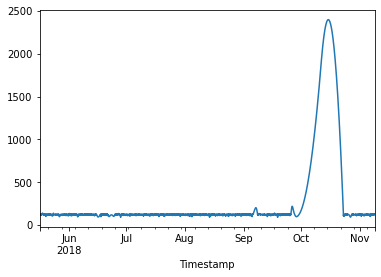

In [68]:
p9690_s_train.interpolate(method='polynomial', order=2).plot()


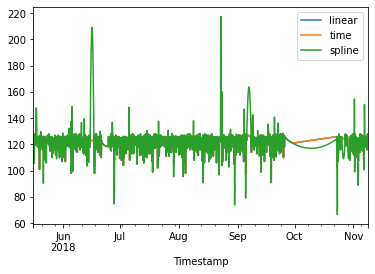

In [77]:
p9690_s_train.interpolate().plot()
p9690_s_train.interpolate(method='time').plot()
p9690_s_train.interpolate(method='spline',order = 2).plot()

lines, labels = plt.gca().get_legend_handles_labels()

labels = ['linear', 'time' ,'spline']
plt.legend(lines, labels, loc='best')


Gaussian regression

Kalman filter

MICE

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice =  p9690.filter(['Systolic','Diastolic','Heart Rate'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

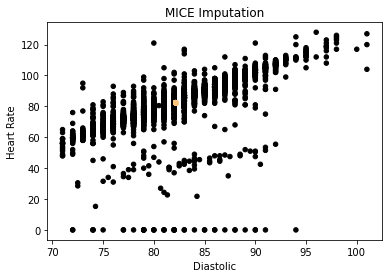

In [20]:
fig = plt.Figure()
null_values = p9690['Systolic'].isnull() 
fig = df_mice_imputed.plot(x='Diastolic', y='Heart Rate', kind='scatter', c=null_values, cmap='copper', title='MICE Imputation', colorbar=False)
#https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87#:~:text=Time%20Series%20Imputation&text=One%20way%20to%20impute%20missing,with%20the%20previously%20observed%20value

In [22]:
df_mice_imputed

,Systolic,Diastolic,Heart Rate
0,125.0000,87.000000,98.000000
1,121.0000,84.000000,39.500000
2,122.5000,84.000000,44.500000
3,123.0000,80.000000,80.000000
4,125.0000,78.000000,72.000000
5,114.0000,74.000000,64.000000
6,124.0000,82.000000,86.000000
7,128.0000,88.000000,97.000000
8,121.6641,82.159383,82.386096
9,121.6641,82.159383,82.386096


In [12]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = p9690.filter(['Systolic','Diastolic','Heart Rate'], axis=1).copy()


# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)


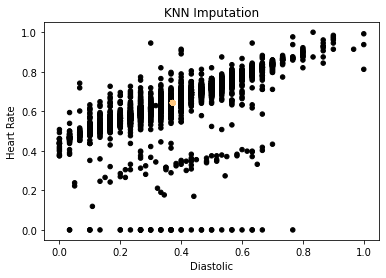

In [21]:
fig = plt.Figure()
null_values = p9690['Systolic'].isnull() 
fig = df_knn_imputed.plot(x='Diastolic', y='Heart Rate', kind='scatter', c=null_values, cmap='copper', title='KNN Imputation', colorbar=False)
